# import packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bloatedHJs.relations import gaussian, poly

In [2]:
# configure matplotlib for better visualisations
from matplotlib import rcParams as rc

rc['xtick.top'] = True
rc['xtick.major.size']     = 6
rc['xtick.minor.size']     = 3

rc['xtick.direction']      = 'in'
rc['xtick.minor.visible']  = True 
rc['xtick.minor.top']      = True 
rc['xtick.minor.bottom']   = True 

rc['ytick.right']          = True
rc['ytick.major.size']     = 6
rc['ytick.minor.size']     = 3

rc['ytick.direction']      = 'in'
rc['ytick.minor.visible']  = True
rc['ytick.major.right']    = True
rc['ytick.minor.right']    = True

rc['font.size']            = 16
rc['xtick.major.pad']      = 8.0
rc['xtick.minor.pad']      = 8.0

In [3]:
# some color conventions
c_linear = 'C0'
c_log    = 'C3'

# functions

In [4]:
def get_ci(xl, yl, func):
    if func == poly:
        yl = poly(xl[:,None], yl)
    elif func == gaussian:
        yl = gaussian(xl[:,None], yl)
    
    ci = np.percentile(yl, (0.1, 15.7, 50, 84.3, 99.9), axis=1)
    
    return ci

# MLR distribution

In [5]:
xl_mlr = np.linspace(0.65, 2.0, 100)

In [6]:
mlr_21_linear_poly = pd.read_csv('data/MLR_group21_lumilinear_poly_chains.csv')
mlr_21_log_poly    = pd.read_csv('data/MLR_group21_lumilog_poly_chains.csv')

In [7]:
mlr_21_linear_poly.head()

,a4,a3,a2,a1,a0
0,2.855442,-20.328898,48.383580,-43.178498,13.097671
1,1.957103,-14.337544,34.022569,-28.674198,7.937698
2,3.329156,-23.079538,53.686747,-47.039167,13.921304
3,4.162417,-27.870189,63.342470,-54.788468,15.945246
4,6.531572,-43.954300,101.225300,-91.553127,28.320130


In [8]:
yl = np.array([mlr_21_linear_poly['a4'], mlr_21_linear_poly['a3'], mlr_21_linear_poly['a2'], \
               mlr_21_linear_poly['a1'], mlr_21_linear_poly['a0']])
ci_mlr_21_linear = get_ci(xl_mlr, yl, poly)

In [9]:
yl = np.array([mlr_21_log_poly['a4'], mlr_21_log_poly['a3'], mlr_21_log_poly['a2'], \
               mlr_21_log_poly['a1'], mlr_21_log_poly['a0']])
ci_mlr_21_log = get_ci(xl_mlr, yl, poly)

Text(0, 0.5, 'Log10 Lumi [LJ]')

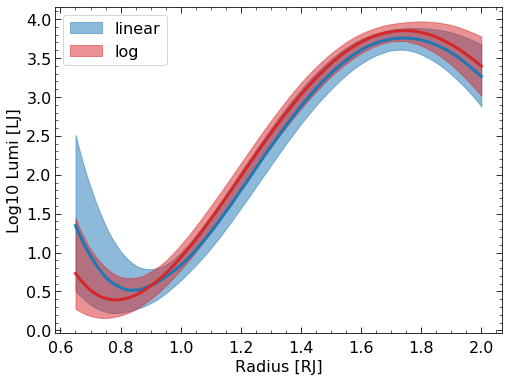

In [10]:
# figure
plt.figure(figsize=(8,6))
plt.fill_between(xl_mlr, ci_mlr_21_linear[1], ci_mlr_21_linear[3], alpha = 0.5, label='linear', \
                 color=c_linear)
plt.plot(xl_mlr, ci_mlr_21_linear[2], lw = 3, c=c_linear)

plt.fill_between(xl_mlr, ci_mlr_21_log[1], ci_mlr_21_log[3], alpha = 0.5, label='log', \
                 color=c_log)
plt.plot(xl_mlr, ci_mlr_21_log[2], lw = 3, c=c_log)

plt.legend()
plt.xlabel('Radius [RJ]')
plt.ylabel('Log10 Lumi [LJ]')

# HEET distribution

In [11]:
xl_heet = np.linspace(0.66, 2.56, 1000)

In [12]:
heet_linear_gauss = pd.read_csv('data/HEET_lumilinear_gauss_chains.csv')
heet_linear_poly  = pd.read_csv('data/HEET_lumilinear_poly_chains.csv')
heet_log_gauss    = pd.read_csv('data/HEET_lumilog_gauss_chains.csv')

In [13]:
heet_linear_gauss.head()

,Amp,Teq0,s
0,2.350389,1.915266,0.523737
1,2.023508,1.828526,0.505109
2,2.676817,1.872726,0.481764
3,2.643102,1.924157,0.505854
4,2.550863,1.757233,0.517780


In [14]:
yl = np.array([heet_linear_gauss['Amp'], heet_linear_gauss['Teq0'], heet_linear_gauss['s']])
ci_heet_linear_gauss = get_ci(xl_heet, yl, gaussian)

In [15]:
yl = np.array([heet_linear_poly['a4'], heet_linear_poly['a3'], heet_linear_poly['a2'], \
               heet_linear_poly['a1'], heet_linear_poly['a0']])
ci_heet_linear_poly = get_ci(xl_heet, yl, poly)

In [16]:
yl = np.array([heet_log_gauss['Amp'], heet_log_gauss['Teq0'], heet_log_gauss['s']])
ci_heet_log_gauss = get_ci(xl_heet, yl, gaussian)

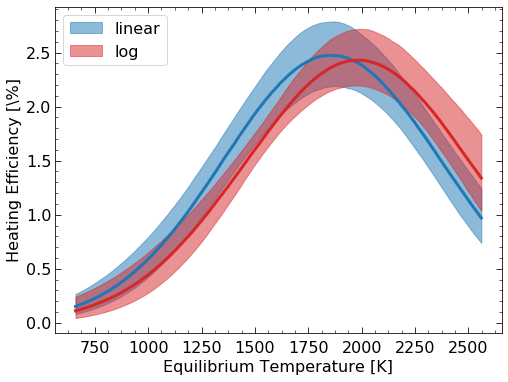

In [17]:
# figure
plt.figure(figsize=(8,6))
plt.fill_between(xl_heet*1000, ci_heet_linear_gauss[1], ci_heet_linear_gauss[3], alpha = 0.5, label='linear', \
                 color=c_linear)
plt.plot(xl_heet*1000, ci_heet_linear_gauss[2], lw = 3, c=c_linear)

plt.fill_between(xl_heet*1000, ci_heet_log_gauss[1], ci_heet_log_gauss[3], alpha = 0.5, label='log', \
                 color=c_log)
plt.plot(xl_heet*1000, ci_heet_log_gauss[2], lw = 3, c=c_log)

plt.legend(loc='upper left')
plt.xlabel('Equilibrium Temperature [K]')
plt.ylabel('Heating Efficiency [\%]');

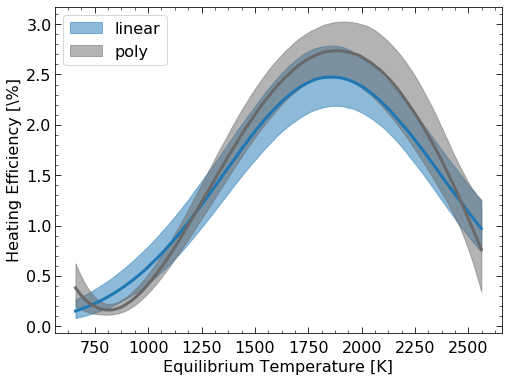

In [18]:
# figure
plt.figure(figsize=(8,6))
plt.fill_between(xl_heet*1000, ci_heet_linear_gauss[1], ci_heet_linear_gauss[3], alpha = 0.5, label='linear', \
                 color=c_linear)
plt.plot(xl_heet*1000, ci_heet_linear_gauss[2], lw = 3, c=c_linear)

plt.fill_between(xl_heet*1000, ci_heet_linear_poly[1], ci_heet_linear_poly[3], alpha = 0.5, label='poly', \
                 color='dimgray')
plt.plot(xl_heet*1000, ci_heet_linear_poly[2], lw = 3, c='dimgray')

plt.legend(loc='upper left')
plt.xlabel('Equilibrium Temperature [K]')
plt.ylabel('Heating Efficiency [\%]');

# Prcb-Teq distribution

In [19]:
xl_pt = np.linspace(0.66, 2.56, 1000)

In [20]:
pt_linear_poly = pd.read_csv('data/Prcb_Teq_relation_lumilinear_poly_chains.csv')
pt_log_poly    = pd.read_csv('data/Prcb_Teq_relation_lumilog_poly_chains.csv')

In [21]:
pt_linear_poly.head()

,a4,a3,a2,a1,a0
0,0.278207,-2.770818,10.236830,-16.648397,10.103972
1,0.290416,-2.971645,11.150728,-18.262979,11.086488
2,0.237511,-2.475496,9.442208,-15.715011,9.707577
3,-0.194548,0.992292,-0.869373,-2.252096,3.192791
4,-0.183886,0.772590,0.224413,-4.317013,4.536695


In [22]:
yl = np.array([pt_linear_poly['a4'], pt_linear_poly['a3'], pt_linear_poly['a2'], \
               pt_linear_poly['a1'], pt_linear_poly['a0']])
ci_pt_linear_poly = get_ci(xl_pt, yl, poly)

In [23]:
yl = np.array([pt_log_poly['a4'], pt_log_poly['a3'], pt_log_poly['a2'], \
               pt_log_poly['a1'], pt_log_poly['a0']])
ci_pt_log_poly = get_ci(xl_pt, yl, poly)

In [24]:
ci_pt_linear_poly = ci_pt_linear_poly * 100
ci_pt_log_poly    = ci_pt_log_poly * 100

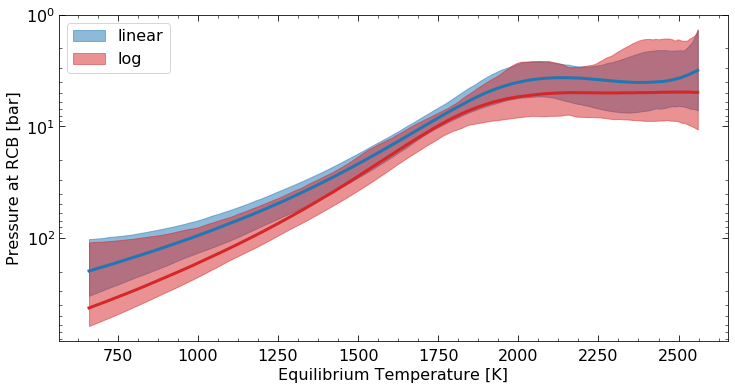

In [25]:
# figure
plt.figure(figsize=(12,6))
plt.fill_between(xl_pt*1000, ci_pt_linear_poly[0], ci_pt_linear_poly[-1], alpha = 0.5, label='linear', \
                 color=c_linear)
plt.plot(xl_pt*1000, ci_pt_linear_poly[2], lw = 3, c=c_linear)

plt.fill_between(xl_pt*1000, ci_pt_log_poly[0], ci_pt_log_poly[-1], alpha = 0.5, label='log', \
                 color=c_log)
plt.plot(xl_pt*1000, ci_pt_log_poly[2], lw = 3, c=c_log)

plt.legend(loc='upper left')
plt.xlabel('Equilibrium Temperature [K]')
plt.ylabel('Pressure at RCB [bar]')
plt.yscale('log')
plt.gca().invert_yaxis();

# Tint-Teq distribution

In [26]:
xl_tt = np.linspace(0.66, 2.56, 1000)

In [27]:
tt_linear_gauss = pd.read_csv('data/Tint_Teq_relation_lumilinear_gaussian_chains.csv')
tt_log_gauss    = pd.read_csv('data/Tint_Teq_relation_lumilog_gaussian_chains.csv')

In [28]:
tt_linear_gauss.head()

,Amp,Teq0,s
0,0.785123,2.366826,0.736417
1,0.751253,2.373616,0.738532
2,0.745934,2.294018,0.720251
3,0.747193,2.275708,0.697016
4,0.793872,2.391791,0.747736


In [29]:
yl = np.array([tt_linear_gauss['Amp'], tt_linear_gauss['Teq0'], tt_linear_gauss['s']])
ci_tt_linear_gauss = get_ci(xl_tt, yl, gaussian)

In [30]:
yl = np.array([tt_log_gauss['Amp'], tt_log_gauss['Teq0'], tt_log_gauss['s']])
ci_tt_log_gauss = get_ci(xl_tt, yl, gaussian)

In [31]:
ci_tt_linear_gauss = ci_tt_linear_gauss * 1000
ci_tt_log_gauss    = ci_tt_log_gauss * 1000

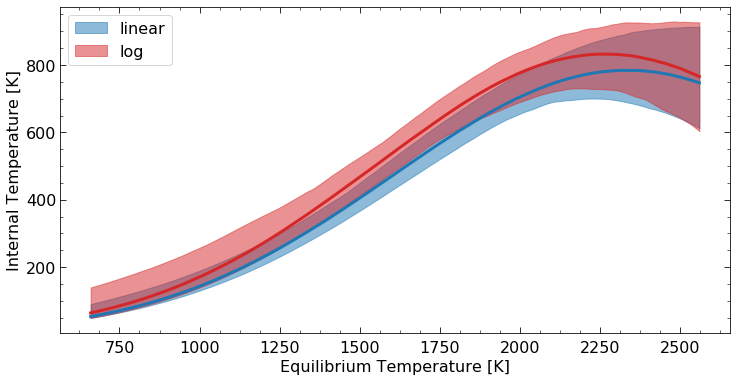

In [32]:
# figure
plt.figure(figsize=(12,6))
plt.fill_between(xl_tt*1000, ci_tt_linear_gauss[0], ci_tt_linear_gauss[-1], alpha = 0.5, label='linear', \
                 color=c_linear)
plt.plot(xl_tt*1000, ci_tt_linear_gauss[2], lw = 3, c=c_linear)

plt.fill_between(xl_tt*1000, ci_tt_log_gauss[0], ci_tt_log_gauss[-1], alpha = 0.5, label='log', \
                 color=c_log)
plt.plot(xl_tt*1000, ci_tt_log_gauss[2], lw = 3, c=c_log)

plt.legend()
plt.xlabel('Equilibrium Temperature [K]')
plt.ylabel('Internal Temperature [K]');